In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [ ]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [22]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterionD = nn.BCELoss().to(device)
criterionG = nn.MSELoss(reduction='mean').to(device)

G_losses, D_losses = [], []

In [23]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterionD(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterionD(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            fx = netD(data_real, feature_matching='last')
            fgz = netD(data_fake, feature_matching='last')
            mean_fx = torch.mean(fx, 0).detach()
            mean_fgz = torch.mean(fgz, 0)
            errG = criterionG(mean_fx, mean_fgz)

            errG.backward()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

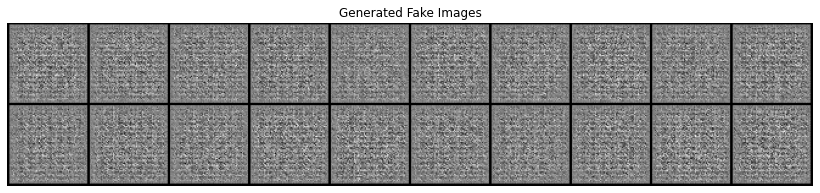

In [24]:
generate_images(netG)

In [25]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 1.6785   Loss_G: 0.1066   D(x): 0.6233   D(G(z)): 0.6061
[100/468]   Loss_D: 0.0284   Loss_G: 0.0229   D(x): 0.9808   D(G(z)): 0.0083
[200/468]   Loss_D: 0.0474   Loss_G: 0.0154   D(x): 0.9820   D(G(z)): 0.0279
[300/468]   Loss_D: 0.0356   Loss_G: 0.0135   D(x): 0.9767   D(G(z)): 0.0115
[400/468]   Loss_D: 0.0794   Loss_G: 0.0110   D(x): 0.9606   D(G(z)): 0.0349
   EPOCH:  1
[000/468]   Loss_D: 0.0325   Loss_G: 0.0121   D(x): 0.9893   D(G(z)): 0.0210
[100/468]   Loss_D: 0.0217   Loss_G: 0.0127   D(x): 0.9884   D(G(z)): 0.0098
[200/468]   Loss_D: 1.0716   Loss_G: 0.0025   D(x): 0.4941   D(G(z)): 0.2561
[300/468]   Loss_D: 0.1576   Loss_G: 0.0070   D(x): 0.8995   D(G(z)): 0.0429
[400/468]   Loss_D: 0.0811   Loss_G: 0.0116   D(x): 0.9319   D(G(z)): 0.0058
   EPOCH:  2
[000/468]   Loss_D: 0.0797   Loss_G: 0.0083   D(x): 0.9611   D(G(z)): 0.0371
[100/468]   Loss_D: 0.0389   Loss_G: 0.0111   D(x): 0.9836   D(G(z)): 0.0216
[200/468]   Loss_D: 0.0648   Loss_G: 

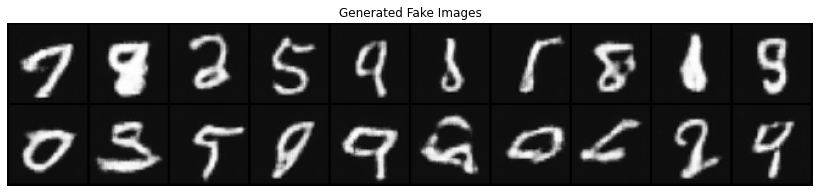

In [26]:
generate_images(netG)

In [27]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.6472   Loss_G: 0.0043   D(x): 0.8726   D(G(z)): 0.3224
[100/468]   Loss_D: 0.6182   Loss_G: 0.0056   D(x): 0.6824   D(G(z)): 0.0855
[200/468]   Loss_D: 0.0334   Loss_G: 0.0147   D(x): 0.9933   D(G(z)): 0.0251
[300/468]   Loss_D: 0.0257   Loss_G: 0.0097   D(x): 0.9934   D(G(z)): 0.0178
[400/468]   Loss_D: 0.0220   Loss_G: 0.0121   D(x): 0.9988   D(G(z)): 0.0198
   EPOCH:  1
[000/468]   Loss_D: 0.0056   Loss_G: 0.0122   D(x): 0.9977   D(G(z)): 0.0033
[100/468]   Loss_D: 0.6639   Loss_G: 0.0033   D(x): 0.6015   D(G(z)): 0.0483
[200/468]   Loss_D: 0.4085   Loss_G: 0.0040   D(x): 0.7370   D(G(z)): 0.0244
[300/468]   Loss_D: 0.2934   Loss_G: 0.0038   D(x): 0.9469   D(G(z)): 0.1707
[400/468]   Loss_D: 0.1693   Loss_G: 0.0070   D(x): 0.9434   D(G(z)): 0.0887
   EPOCH:  2
[000/468]   Loss_D: 0.1251   Loss_G: 0.0066   D(x): 0.9195   D(G(z)): 0.0313
[100/468]   Loss_D: 0.0974   Loss_G: 0.0063   D(x): 0.9423   D(G(z)): 0.0296
[200/468]   Loss_D: 0.0547   Loss_G: 

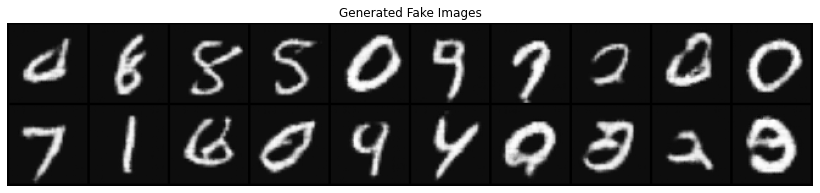

In [28]:
generate_images(netG)

In [29]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0100   Loss_G: 0.0095   D(x): 0.9955   D(G(z)): 0.0049
[100/468]   Loss_D: 0.1406   Loss_G: 0.0058   D(x): 0.9596   D(G(z)): 0.0834
[200/468]   Loss_D: 0.1691   Loss_G: 0.0058   D(x): 0.9617   D(G(z)): 0.0991
[300/468]   Loss_D: 0.0193   Loss_G: 0.0077   D(x): 0.9957   D(G(z)): 0.0146
[400/468]   Loss_D: 0.0082   Loss_G: 0.0102   D(x): 0.9943   D(G(z)): 0.0025
   EPOCH:  1
[000/468]   Loss_D: 0.0136   Loss_G: 0.0113   D(x): 0.9948   D(G(z)): 0.0075
[100/468]   Loss_D: 0.0116   Loss_G: 0.0105   D(x): 0.9950   D(G(z)): 0.0064
[200/468]   Loss_D: 0.0163   Loss_G: 0.0086   D(x): 0.9875   D(G(z)): 0.0034
[300/468]   Loss_D: 0.0056   Loss_G: 0.0091   D(x): 0.9978   D(G(z)): 0.0033
[400/468]   Loss_D: 0.9599   Loss_G: 0.0033   D(x): 0.7570   D(G(z)): 0.4651
   EPOCH:  2
[000/468]   Loss_D: 0.6921   Loss_G: 0.0029   D(x): 0.6846   D(G(z)): 0.2229
[100/468]   Loss_D: 0.9443   Loss_G: 0.0055   D(x): 0.4876   D(G(z)): 0.0133
[200/468]   Loss_D: 0.1612   Loss_G: 

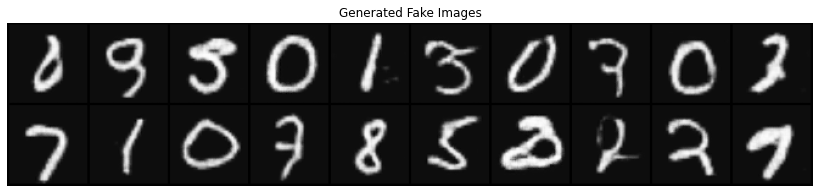

In [30]:
generate_images(netG)

In [31]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0359   Loss_G: 0.0078   D(x): 0.9886   D(G(z)): 0.0235
[100/468]   Loss_D: 0.8394   Loss_G: 0.0061   D(x): 0.9619   D(G(z)): 0.4590
[200/468]   Loss_D: 0.1333   Loss_G: 0.0064   D(x): 0.8965   D(G(z)): 0.0150
[300/468]   Loss_D: 0.0807   Loss_G: 0.0066   D(x): 0.9728   D(G(z)): 0.0460
[400/468]   Loss_D: 0.1351   Loss_G: 0.0050   D(x): 0.9068   D(G(z)): 0.0247
   EPOCH:  1
[000/468]   Loss_D: 0.0382   Loss_G: 0.0060   D(x): 0.9783   D(G(z)): 0.0153
[100/468]   Loss_D: 0.0069   Loss_G: 0.0083   D(x): 0.9972   D(G(z)): 0.0039
[200/468]   Loss_D: 0.0135   Loss_G: 0.0077   D(x): 0.9983   D(G(z)): 0.0115
[300/468]   Loss_D: 0.0124   Loss_G: 0.0088   D(x): 0.9937   D(G(z)): 0.0058
[400/468]   Loss_D: 0.0090   Loss_G: 0.0079   D(x): 0.9976   D(G(z)): 0.0063
   EPOCH:  2
[000/468]   Loss_D: 0.0169   Loss_G: 0.0087   D(x): 0.9878   D(G(z)): 0.0044
[100/468]   Loss_D: 0.0054   Loss_G: 0.0100   D(x): 0.9964   D(G(z)): 0.0017
[200/468]   Loss_D: 0.0058   Loss_G: 

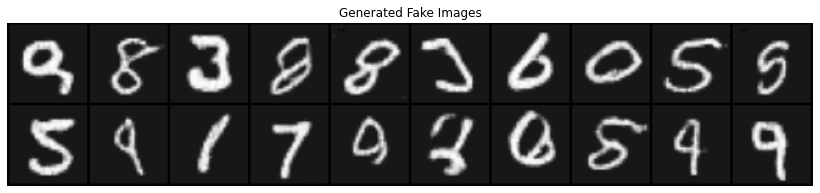

In [32]:
generate_images(netG)

In [33]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0234   Loss_G: 0.0102   D(x): 0.9998   D(G(z)): 0.0207
[100/468]   Loss_D: 0.3858   Loss_G: 0.0034   D(x): 0.8722   D(G(z)): 0.1823
[200/468]   Loss_D: 0.2394   Loss_G: 0.0049   D(x): 0.8497   D(G(z)): 0.0299
[300/468]   Loss_D: 0.1442   Loss_G: 0.0036   D(x): 0.9493   D(G(z)): 0.0757
[400/468]   Loss_D: 1.0966   Loss_G: 0.0040   D(x): 0.9927   D(G(z)): 0.4887
   EPOCH:  1
[000/468]   Loss_D: 0.0949   Loss_G: 0.0056   D(x): 0.9795   D(G(z)): 0.0637
[100/468]   Loss_D: 0.4538   Loss_G: 0.0050   D(x): 0.7046   D(G(z)): 0.0180
[200/468]   Loss_D: 0.1076   Loss_G: 0.0052   D(x): 0.9734   D(G(z)): 0.0627
[300/468]   Loss_D: 0.4407   Loss_G: 0.0035   D(x): 0.8881   D(G(z)): 0.2208
[400/468]   Loss_D: 0.4484   Loss_G: 0.0033   D(x): 0.7206   D(G(z)): 0.0539
   EPOCH:  2
[000/468]   Loss_D: 0.0347   Loss_G: 0.0058   D(x): 0.9862   D(G(z)): 0.0194
[100/468]   Loss_D: 0.0316   Loss_G: 0.0066   D(x): 0.9806   D(G(z)): 0.0114
[200/468]   Loss_D: 0.0098   Loss_G: 

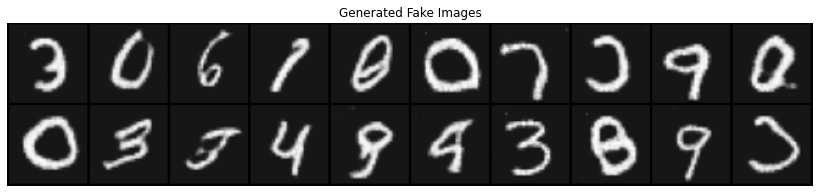

In [34]:
generate_images(netG)

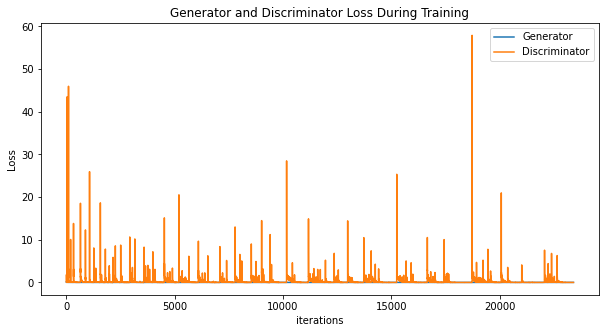

In [35]:
plot_losses(G_losses, D_losses)